# **ML Class Project code**
**Ashish Kumar**

**2017B1A70854P**

In [ ]:
#Install openCV, Run only once persession at the start to prevent restarting an losing progress.
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 173kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


     |████████████████████████████████| 30.6MB 159kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
import numpy as np
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

from natsort import natsorted
from IPython.display import Image, display
from google.colab import files
from google.colab import files

In [ ]:
#upload image dataset
uploaded = files.upload()
!mkdir sift_dataset
!unzip classpro.zip -d sift_dataset

In [ ]:
#open files for writing
#Files with g1, g2 use the updated method of calculating the score i.e. use 2 good score arrays good1 and good2
#These files have symmetrical matching scores

file1_g1g2 = open("../complete_knn2_g1_g2_same_person_is_match.csv","w")
file2_g1g2 = open("../imposter_knn2_g1_g2__same_person_is_match.csv","w")
file3_g1g2 = open("../match_knn2_g1_g2_same_person_is_match.csv","w")\

#Files with g at their name end, use the old method of calculating the score i.e. use a single good array to save score
#These files contain unsymmetrical scores after matching the image1 with image2
file1_g = open("../complete_knn2_g_same_person_is_match.csv","w")
file2_g = open("../imposter_knn2_g__same_person_is_match.csv","w")
file3_g = open("../match_knn2_g_same_person_is_match.csv","w")

In [ ]:
#Files created for match, imposter, and complete
#Match file (file3) - contains image number and score for all the images where first and seconf images are of the same subject
#Imposter file (file2) - contains image number and sc. for all images with first and second images for different subject
#Complete file (file1) - contains image number and score for all subject matches

def getSubjectNo(str):
    stri = str.split('_')
    return int(stri[0])

def calculate_score():
    sift = cv2.xfeatures2d.SIFT_create()
    bf = cv2.BFMatcher()
    path1 = './'

    for images in natsorted(os.listdir('.')): #Sorts the files inside PWD into natural sorting order
        str1 = str(images)
        img1 = os.path.join(path1, images) #Joins the path1 and img1
        img1 = cv2.imread(img1) # Loads img1 from the specified path in img1
        kp1, des1 = sift.detectAndCompute(img1,None)
        if len(kp1)>0:
            for image in natsorted(os.listdir('.')):
                img2 = os.path.join(path1, image)
                # print(f"Image1: {img1} ---- Image2: {img2}-")
                str2 = str(image)
                if (img1 != img2): # queryImage # No need
                    img2 = cv2.imread(img2) # trainImage
                    kp2, des2 = sift.detectAndCompute(img2,None)
                    # Initiate SIFT detector
                    # sift = cv2.SIFT()            
                    # find the keypoints and descriptors with SIFT
                    # BFMatcher with default params

                    if len(kp1)==0 or len(kp2)==0:
                        continue

                    matches1 = bf.knnMatch(des1, des2, k=2)
                    matches2 = bf.knnMatch(des2, des1, k=2)
                    dis = bf.match(des1,des2)

                    number_keypoints = 0
                    if len(kp1) <= len(kp2):
                        number_keypoints = len(kp1)
                    else:
                        number_keypoints = len(kp2)
                    good1 = []
                    good2 = []
                    good = []
 
                    if len(kp1)==1 or len(kp2)==1:
                        print(f"Len(kp1): {len(kp1)}")
                        print(f"Len(kp2): {len(kp2)}")
                        for m in matches1:
                            good1.append([m])
                            good.append([m])
                        for m in matches2:
                            good2.append([m])
                    else:
                        print(f"Len(kp1): {len(kp1)}")
                        print(f"Len(kp2): {len(kp2)}")
                        for m,n in matches1:
                            if m.distance < 0.7*n.distance:
                                good1.append([m])
                                good.append([m])
                        for m,n in matches2:
                            if m.distance < 0.7*n.distance:
                                good2.append([m])
                    score = len(good)
                    score1 = len(good1)
                    score2 = len(good2)
                    score_g1g2 = max(score1, score2)/number_keypoints
                    score_g = len(good)/number_keypoints

                    file1_g1g2.write( str1 + "," + str2 + "," + str(score_g1g2)+"\n")
                    file1_g.write(str1+","+str2+","+str(score_g)+\n")
                    if(getSubjectNo(str1) == getSubjectNo(str2)):
                        file3_g1g2.write(str1+","+str2+","+str(score_g1g2)+"\n")
                        file3_g.write(str1+","+str2+","+str(score_g)+\n")
                        print(f"G1G2Match: {str1},{str2},{str(score_g1g2)}") # replace with 'cos' if using cosine similarity 
                        print(f"G   Match: {str1},{str2},{str(score_g)}")
                    else:
                        file2_g1g2.write(str1+","+str2+","+str(score_g1g2)+"\n")
                        file2_g.write(str1+","+str2+","+str(score_g)+\n")
                        print(f"G1G2Imposter: {str1},{str2},{str(score_g1g2)}")
                        print(f"G   Imposter: {str1},{str2},{str(score_g)}")


calculate_score()

In [3]:
!ls

sample_data


In [4]:
%cd sift_dataset

[Errno 2] No such file or directory: 'sift_dataset'
/content


In [5]:
files.upload()

Saving match_knn2_g_same_person_is_match.csv to match_knn2_g_same_person_is_match.csv
Saving imposter_knn2_g__same_person_is_match.csv to imposter_knn2_g__same_person_is_match.csv
Saving complete_knn2_g_same_person_is_match.csv to complete_knn2_g_same_person_is_match.csv
Saving complete_knn2_g1_g2_same_person_is_match.csv to complete_knn2_g1_g2_same_person_is_match.csv
Saving imposter_knn2_g1_g2__same_person_is_match.csv to imposter_knn2_g1_g2__same_person_is_match.csv
Saving match_knn2_g1_g2_same_person_is_match.csv to match_knn2_g1_g2_same_person_is_match.csv


In [ ]:
# Initialize Pandas dataframe
match_data_g = pd.read_csv("match_knn2_g_same_person_is_match.csv")
match_data_g1g2 = pd.read_csv("match_knn2_g1_g2_same_person_is_match.csv")

# complete_data_g = pd.read_csv("complete_knn2_g_same_person_is_match.csv")
# complete_data_g1g2 = pd.read_csv("complete_knn2_g1_g2_same_person_is_match.csv")

imposter_data_g = pd.read_csv("imposter_knn2_g__same_person_is_match.csv")
imposter_data_g1g2 = pd.read_csv("imposter_knn2_g1_g2__same_person_is_match.csv")

#Store ['score'] column in a list
match_list_g = match_data_g['score']
match_list_g1g2 = match_data_g1g2['score']

# complete_list_g = complete_data_g['score']
# complete_list_g1g2 = complete_data_g1g2['score']

imposter_list_g = imposter_data_g['score']
imposter_list_g1g2 = imposter_data_g1g2['score']

#Convert list to np array
match_g_np = np.array(match_list_g)
match_g1g2_np = np.array(match_list_g1g2)

imposter_g_np = np.array(imposter_list_g)
imposter_g1g2_np = np.array(imposter_list_g1g2)

# complete_g_np = np.array(complete_list_g)
# complete_g1g2_np = np.array(complete_list_g1g2)

#Do not run the function in colab, will lead to crash due to RAM usage  
#initialize_variables()

In [ ]:
match_data_g = pd.read_csv("match_knn2_g_same_person_is_match.csv")
# match_data_g1g2 = pd.read_csv("match_knn2_g1_g2_same_person_is_match.csv")

In [ ]:
# complete_data_g = pd.read_csv("complete_knn2_g_same_person_is_match.csv")
# complete_data_g1g2 = pd.read_csv("complete_knn2_g1_g2_same_person_is_match.csv")

In [ ]:
imposter_data_g = pd.read_csv("imposter_knn2_g__same_person_is_match.csv")
# imposter_data_g1g2 = pd.read_csv("imposter_knn2_g1_g2__same_person_is_match.csv")

In [ ]:
imposter_data_g.head()

,Image1,Image2,score
0,1_P1_S1_1.jpg,2_P1_S1_1.jpg,0.0000
1,1_P1_S1_1.jpg,2_P1_S1_2.jpg,0.0000
2,1_P1_S1_1.jpg,2_P1_S1_3.jpg,0.0625
3,1_P1_S1_1.jpg,2_P1_S1_4.jpg,0.0000
4,1_P1_S1_1.jpg,2_P1_S1_5.jpg,0.0000


In [23]:
def count_true_matches(list1, list2):
    total_matches = 0
    same_img_matches = 0
    for i in range(1,len(list1)):
        if(list1[i] == list2[i]):
            same_img_matches += 1
        
        total_matches += 1

    return total_matches-same_img_matches


def count_fraud_matches(list1, list2):
    total_matches = 0
    same_img_matches = 0
    for i in range(1,len(list1)):
        if(list1[i] == list2[i]):
            same_img_matches += 1
        
        total_matches += 1

    return same_img_matches


def count_scores_over(data, lower_lim=0.5): #count no. of datapoints with score over a certain threshold, default 0.5
    total = 0
    for i in data:
        # print(i)
        if(i >= lower_lim):
            total += 1

    return total


def test(match_data, imposter_data):
    fraud_matches_gen = count_fraud_matches(match_data['Image1'].tolist(), match_data['Image2'].tolist())
    score_over_gen = count_scores_over(match_data['score'].tolist()[1:], 1.0)
    fraud_matches_imp = count_fraud_matches(imposter_data['Image1'].tolist(), imposter_data['Image2'].tolist())
    score_over_imp = count_scores_over(imposter_data['score'].tolist()[1:], 1.0)
    print("--------------------GENUINE MATCHES---------------------")
    print(f"Scores over 0.9: {score_over_gen}")
    print(f"Scores over 0.8: {count_scores_over(match_data['score'].tolist()[1:], 0.8)}")
    print(f"Scores over 0.7: {count_scores_over(match_data['score'].tolist()[1:], 0.7)}")
    print(f"Scores over 0.6: {count_scores_over(match_data['score'].tolist()[1:], 0.6)}")
    print(f"Scores over 0.5: {count_scores_over(match_data['score'].tolist()[1:], 0.5)}")        
    print(f"Percentage scores over 0.9: {(count_scores_over(match_data['score'].tolist()[1:],0.9))/len(match_data['score'].tolist()[1:])}")
    print(f"Percentage scores over 0.8: {(count_scores_over(match_data['score'].tolist()[1:],0.8))/len(match_data['score'].tolist()[1:])}")
    print(f"Percentage scores over 0.7: {(count_scores_over(match_data['score'].tolist()[1:],0.7))/len(match_data['score'].tolist()[1:])}")
    print(f"Percentage scores over 0.6: {(count_scores_over(match_data['score'].tolist()[1:],0.6))/len(match_data['score'].tolist()[1:])}")
    print(f"Percentage scores over 0.5: {(count_scores_over(match_data['score'].tolist()[1:],0.5))/len(match_data['score'].tolist()[1:])}")
    print("--------------------------------------------------------")

    print("--------------------IMPOSTER MATCHES--------------------")
    print(f"Scores over 0.9: {score_over_imp}")
    print(f"Scores over 0.8: {count_scores_over(imposter_data['score'].tolist()[1:], 0.8)}")
    print(f"Scores over 0.7: {count_scores_over(imposter_data['score'].tolist()[1:], 0.7)}")
    print(f"Scores over 0.6: {count_scores_over(imposter_data['score'].tolist()[1:], 0.6)}")
    print(f"Scores over 0.5: {count_scores_over(imposter_data['score'].tolist()[1:], 0.5)}")   
    print(f"Percentage scores over 0.9: {(count_scores_over(imposter_data['score'].tolist()[1:],0.9))/len(imposter_data['score'].tolist()[1:])}")
    print(f"Percentage scores over 0.8: {(count_scores_over(imposter_data['score'].tolist()[1:],0.8))/len(imposter_data['score'].tolist()[1:])}")
    print(f"Percentage scores over 0.7: {(count_scores_over(imposter_data['score'].tolist()[1:],0.7))/len(imposter_data['score'].tolist()[1:])}")
    print(f"Percentage scores over 0.6: {(count_scores_over(imposter_data['score'].tolist()[1:],0.6))/len(imposter_data['score'].tolist()[1:])}")
    print(f"Percentage scores over 0.5: {(count_scores_over(imposter_data['score'].tolist()[1:],0.5))/len(imposter_data['score'].tolist()[1:])}")
    print("--------------------------------------------------------")


test(match_data_g, imposter_data_g)
# test(match_data_g1g2, imposter_data_g1g2)

--------------------GENUINE MATCHES---------------------
Scores over 0.9: 1085
Scores over 0.8: 1111
Scores over 0.7: 1161
Scores over 0.6: 1239
Scores over 0.5: 1429
Percentage scores over 0.9: 0.10535990712074303
Percentage scores over 0.8: 0.10748839009287926
Percentage scores over 0.7: 0.11232585139318886
Percentage scores over 0.6: 0.11987229102167182
Percentage scores over 0.5: 0.13825464396284828
--------------------------------------------------------
--------------------IMPOSTER MATCHES--------------------
Scores over 0.9: 17972
Scores over 0.8: 18746
Scores over 0.7: 19672
Scores over 0.6: 21046
Scores over 0.5: 24304
Percentage scores over 0.9: 0.061032768796250365
Percentage scores over 0.8: 0.06325649825037372
Percentage scores over 0.7: 0.06638119244539377
Percentage scores over 0.6: 0.07101761774124428
Percentage scores over 0.5: 0.08201141222005136
--------------------------------------------------------


In [ ]:
def min_max(numpy_arr):
    min_range = 1000000
    max_range = -1000000
    for i in numpy_arr:
      if(i<min_range):
        min_range = i
      if(i>max_range):
        max_range = i

    print(f"Min: {min_range}")
    print(f"Max: {max_range}")

In [ ]:
#Histograms and plots
def plot_seaborn_kde(listname, _color="blue"):
    fig, ax = plt.subplots()
    sns.kdeplot(listname, ax=ax, color=_color)
    ax.set_xlim(-2,3)
    ax.set_xticks(range(-2,4))
    plt.show()

    #KDE can show negative density even for all positive only data - https://stackoverflow.com/questions/47701159/sns-distplot-is-plotting-negative-values-for-a-only-positive-variable


def plot_seaborn_distplot(listname, _color = "blue"):
    fig, ax = plt.subplots()
    sns.distplot(listname, ax=ax, color=_color)
    ax.set_xlim(-0.5,2)
    ax.set_xticks(range(-1,2))
    plt.show()


#Single histogram without density
def plot_seaborn_histplot(listname, _color="blue"):
    fig, ax = plt.subplots()
    sns.histplot(listname, ax=ax, color=_color)
    ax.set_xlim(-0.5,2)
    ax.set_xticks(range(-1,2))
    plt.show()


#Two histograms together without sensity
def plot_seaborn_2histogram(list1, list2, _color1="green", _color2="red"):
    fig, ax = plt.subplots()
    sns.histplot(list1, ax=ax, label="genuine", color = _color1)
    sns.histplot(list2, ax=ax, label = "imposter", color = _color2)
    ax.set_xlim(-2,3)
    ax.set_ylim(0,1000)
    # ax.set_xticks(range(-2,4))
    plt.legend(loc="upper right")
    plt.show()


#matplotlib histogram with density=True
def plot_pyplot_hist(np_array, np_linspace=np.linspace(-0.1,1.1,40)):
    plt.hist(np_array, bins = np_linspace, density=True)

  
#Pandas density plot
def plot_pandas_density(df_series, _color="green", _figsize=(40,40)):  
    df_series.plot.density(color=_color, figsize = _figsize) #pandas.density is exactly the same as pandas.kde

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


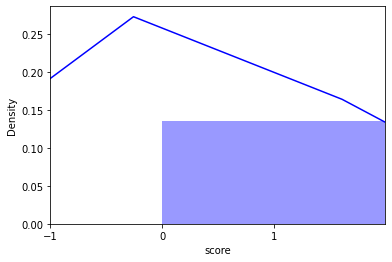

In [ ]:
plot_seaborn_distplot(match_list_g)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


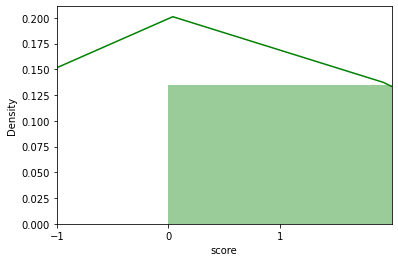

In [ ]:
plot_seaborn_distplot(match_list_g1g2, _color="green")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


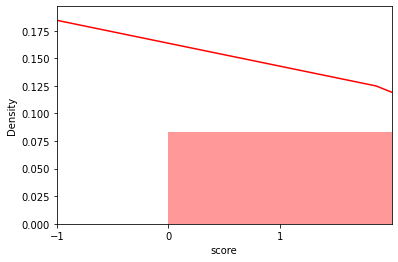

In [ ]:
plot_seaborn_distplot(imposter_list_g, _color="red")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


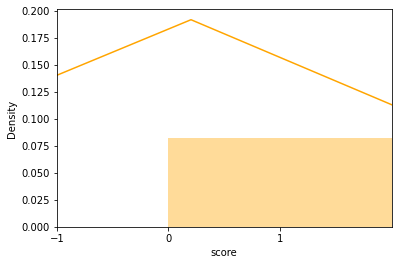

In [ ]:
plot_seaborn_distplot(imposter_list_g1g2, _color="orange")

In [ ]:
match_data_g['score'].describe()

count    10337.000000
mean         0.761763
std          8.457398
min          0.000000
25%          0.000000
50%          0.052632
75%          0.200000
max        364.000000
Name: score, dtype: float64

In [ ]:
match_data_g1g2['score'].describe()

count    10375.000000
mean         1.390772
std         11.902253
min          0.000000
25%          0.030303
50%          0.105263
75%          0.309859
max        364.000000
Name: score, dtype: float64

In [ ]:
imposter_data_g1g2['score'].describe()

count    296350.000000
mean          1.588666
std          17.284204
min           0.000000
25%           0.000000
50%           0.000000
75%           0.055556
max         592.000000
Name: score, dtype: float64

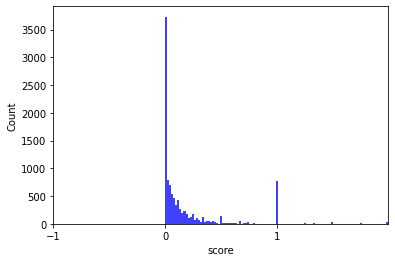

In [ ]:
plot_seaborn_histplot(match_list_g, _color="blue")

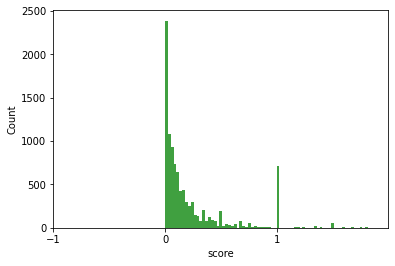

In [ ]:
plot_seaborn_histplot(match_list_g1g2, _color="green")

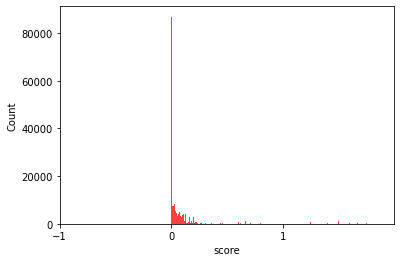

In [ ]:
plot_seaborn_histplot(imposter_list_g1g2, _color="orange")

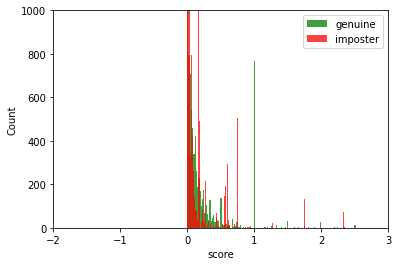

In [ ]:
plot_seaborn_2histogram(match_list_g1g2, imposter_list_g)

In [ ]:
#Density histogram
plt.hist(match_np, bins = np.linspace(-0.1,1.1,20), density=True)

In [ ]:
#Density Histogram
plt.hist(imposter_np, bins = np.linspace(-0.1,1.1,40), density=True)

In [ ]:
df = pd.DataFrame({
    'genuine': match_data['score'],
    'imposter': imposter_data['score'],  
})

ax = df.plot.density(figsize = (10,40))

In [19]:
#CRR, FAR, FRR, EER

#Decision threshold = 0.5
def CRR(match_df, _thresh=0.5):
    total_matches = len(match_df)
    correct_match = 0
    for i in match_df['score']:
        if float(i) >= _thresh:
            correct_match += 1
    
    return float(correct_match/total_matches)


def FAR(match_df, imposter_df, _thresh):
    total_matches = len(match_df)
    incorrect_match = 0
    for i in imposter_df['score']:
        if float(i) > _thresh:
            incorrect_match += 1
    
    return float(incorrect_match/total_matches)


def FRR(match_df, _thresh=0.5):
    total_matches = len(match_df)
    correct_matches_unreco = 0
    for i in match_df['score']:
        if float(i) < _thresh:
              correct_matches_unreco += 1

    return float(correct_matches_unreco/total_matches)



In [17]:
print(CRR(match_data_g1g2, 0.993))

0.13040963855421686


In [20]:
print(CRR(match_data_g1g2, match_list_g1g2.max()))

0.0001927710843373494


In [29]:
#ROC plot and accuracy of the model
def report_accuracy(match_df, imposter_df, _points=100):
    max_match_score = getMaxScore(np.array(match_df['score']))
    max_imposter_score = getMaxScore(np.array(imposter_df['score']))
    min_match_score = getMinScore(np.array(match_df['score']))
    min_imposter_score = getMinScore(np.array(imposter_df['score']))

    thresh_array = np.linspace(max(min_match_score, min_imposter_score),min(max_match_score, max_imposter_score),_points);
    min_frr_far_sum = 100000
    for i in range(0,_points):
        far = FAR(match_df, imposter_df, thresh_array[i])
        frr = FRR(match_data_g, thresh_array[i])
        if far+frr < min_frr_far_sum:
            min_frr_far_sum = far+frr;

    return 100-((min_frr_far_sum)*50)
    

def getMinScore(numpy_ar):
    return numpy_ar.min();


def getMaxScore(numpy_ar):
    return numpy_ar.max();


def plot_ROC(match_df, imposter_df, _points = 100):
    no_of_data_points = _points
    epislon = 0.01
    max_match_score = getMaxScore(np.array(match_df['score']))
    max_imposter_score = getMaxScore(np.array(imposter_df['score']))
    min_match_score = getMinScore(np.array(match_df['score']))
    min_imposter_score = getMinScore(np.array(imposter_df['score']))

    thresh_array = np.linspace(max(min_match_score, min_imposter_score),min(max_match_score, max_imposter_score),no_of_data_points);
    frr_array = []
    far_array = []
    min_frr = 1000000
    min_far = 1000000
    max_frr = -100000
    max_far = -100000
    intersection = -1000
    
    for i in range(0, no_of_data_points):
        print("--------------------------------------------")
        print(i)
        far = FAR(match_df, imposter_df, thresh_array[i])
        frr = FRR(match_df, thresh_array[i])
        if far > max_far:
            max_far = far
        if far < min_far:
            min_far = far
        if frr > max_frr:
            max_frr = frr
        if frr < min_frr:
            min_frr = frr
        print(f"FAR: {far}")
        print(f"FRR: {frr}")
        print(f"threshold: {thresh_array[i]}")
        print("--------------------------------------------")
        frr_array.append(frr)
        far_array.append(far)

    # print(f"Max match: {max_match_score}; Max imposter: {max_imposter_score}; Min match:{min_match_score}; Min imposter: {min_imposter_score}")
    # min_FRR = FRR(match_data_g, imposter_data_g,)

    x = []
    y = []
    ERR_list = [] #list to store the possible points of intersection
    for i in np.linspace(0.01, max(max_frr,max_far), no_of_data_points):
        x.append(i)
        y.append(i)

    for i in range(0, no_of_data_points):
        if abs(x[i]-frr_array[i]) < epislon:
            print(f"i: {i}")
            print(f"difference: {abs(x[i]-frr_array[i])}")
            intersection = x[i]
            ERR_list.append(intersection)

    print(f"Max FRR: {max_frr}, Min FRR: {min_frr}")
    print(f"Max FAR: {max_far}, Min FAR: {min_far}")

    #plotting the graph
    # x = [1,2,3,4,5,6,7,8,9,10]
    # y = [1,4,9,16,25,36,49,64,81,100]

    plt.title("ROC curve")
    plt.xlabel("FAR")
    plt.ylabel("FRR")
    plt.plot(far_array, frr_array, color="red")
    plt.plot(x, y, color="green")
    plt.xlim([min_far, max_far])
    plt.ylim([min_frr, max_frr])
    plt.show()

    # print(frr_array)
    # print(far_array)
    print(f"Intersection coordinates: {intersection, intersection}")
    print(f"ERR intersection: {ERR_list.min()}")
    print("ERR list: ")
    for element in ERR_list:
        print(f"{element}", end=" ")


--------------------------------------------
0
FAR: 20.340819277108434
FRR: 0.0
threshold: 0.0
--------------------------------------------
--------------------------------------------
1
FAR: 1.264
FRR: 0.9847151010931605
threshold: 3.676767676767677
--------------------------------------------
--------------------------------------------
2
FAR: 0.9820722891566265
FRR: 0.9894553545516107
threshold: 7.353535353535354
--------------------------------------------
--------------------------------------------
3
FAR: 0.8615903614457832
FRR: 0.9909064525490955
threshold: 11.030303030303031
--------------------------------------------
--------------------------------------------
4
FAR: 0.7995180722891566
FRR: 0.9920673309470833
threshold: 14.707070707070708
--------------------------------------------
--------------------------------------------
5
FAR: 0.7372530120481928
FRR: 0.9925510302795783
threshold: 18.383838383838384
--------------------------------------------
-------------------------

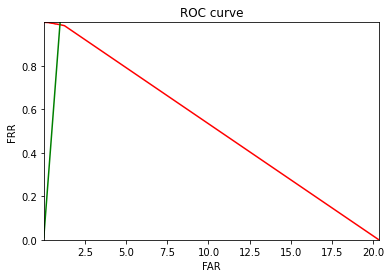

Intersection coordinates: (-1000, -1000)


In [72]:
plot_ROC(match_data_g, imposter_data_g)

Streaming output truncated to the last 5000 lines.
--------------------------------------------
167
FAR: 0.4194698795180723
FRR: 0.9969043242720325
threshold: 60.84884884884885
--------------------------------------------
--------------------------------------------
168
FAR: 0.41445783132530123
FRR: 0.9970010641385315
threshold: 61.213213213213216
--------------------------------------------
--------------------------------------------
169
FAR: 0.41445783132530123
FRR: 0.9970010641385315
threshold: 61.57757757757758
--------------------------------------------
--------------------------------------------
170
FAR: 0.41445783132530123
FRR: 0.9970010641385315
threshold: 61.94194194194194
--------------------------------------------
--------------------------------------------
171
FAR: 0.40925301204819275
FRR: 0.9970010641385315
threshold: 62.306306306306304
--------------------------------------------
--------------------------------------------
172
FAR: 0.40925301204819275
FRR: 0.9970010

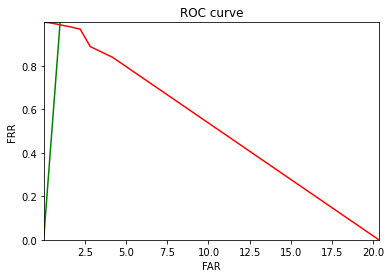

Intersection coordinates: (-1000, -1000)


In [73]:
plot_ROC(match_data_g, imposter_data_g, 1000)

Streaming output truncated to the last 5000 lines.
FAR: 0.04453012048192771
FRR: 0.9997097804005031
threshold: 333.71217121712175
--------------------------------------------
--------------------------------------------
9168
FAR: 0.04453012048192771
FRR: 0.9997097804005031
threshold: 333.7485748574858
--------------------------------------------
--------------------------------------------
9169
FAR: 0.04453012048192771
FRR: 0.9997097804005031
threshold: 333.7849784978498
--------------------------------------------
--------------------------------------------
9170
FAR: 0.04453012048192771
FRR: 0.9997097804005031
threshold: 333.82138213821383
--------------------------------------------
--------------------------------------------
9171
FAR: 0.04453012048192771
FRR: 0.9997097804005031
threshold: 333.85778577857786
--------------------------------------------
--------------------------------------------
9172
FAR: 0.04453012048192771
FRR: 0.9997097804005031
threshold: 333.8941894189419
---

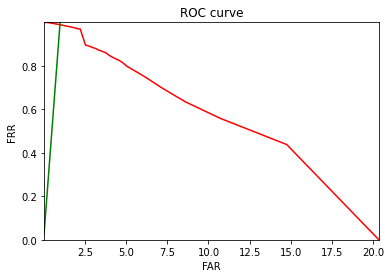

Intersection coordinates: (0.9920767787622136, 0.9920767787622136)


In [75]:
plot_ROC(match_data_g, imposter_data_g, 10000)

Streaming output truncated to the last 5000 lines.
FAR: 0.02930120481927711
FRR: 0.9999032601335011
threshold: 360.9824098240983
--------------------------------------------
--------------------------------------------
99171
FAR: 0.02930120481927711
FRR: 0.9999032601335011
threshold: 360.9860498604986
--------------------------------------------
--------------------------------------------
99172
FAR: 0.02930120481927711
FRR: 0.9999032601335011
threshold: 360.989689896899
--------------------------------------------
--------------------------------------------
99173
FAR: 0.02930120481927711
FRR: 0.9999032601335011
threshold: 360.9933299332993
--------------------------------------------
--------------------------------------------
99174
FAR: 0.02930120481927711
FRR: 0.9999032601335011
threshold: 360.9969699696997
--------------------------------------------
--------------------------------------------
99175
FAR: 0.02930120481927711
FRR: 0.9999032601335011
threshold: 361.0006100061001
--

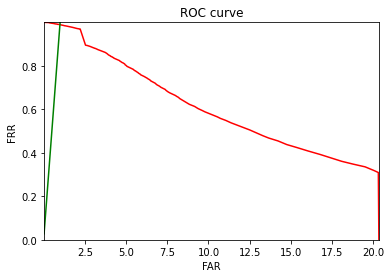

Intersection coordinates: (0.9934115625493604, 0.9934115625493604)


AttributeError: ignored

In [78]:
plot_ROC(match_data_g, imposter_data_g, 100000)

Streaming output truncated to the last 5000 lines.
--------------------------------------------
167
FAR: 0.4194698795180723
FRR: 0.9969043242720325
threshold: 60.84884884884885
--------------------------------------------
--------------------------------------------
168
FAR: 0.41445783132530123
FRR: 0.9970010641385315
threshold: 61.213213213213216
--------------------------------------------
--------------------------------------------
169
FAR: 0.41445783132530123
FRR: 0.9970010641385315
threshold: 61.57757757757758
--------------------------------------------
--------------------------------------------
170
FAR: 0.41445783132530123
FRR: 0.9970010641385315
threshold: 61.94194194194194
--------------------------------------------
--------------------------------------------
171
FAR: 0.40925301204819275
FRR: 0.9970010641385315
threshold: 62.306306306306304
--------------------------------------------
--------------------------------------------
172
FAR: 0.40925301204819275
FRR: 0.9970010

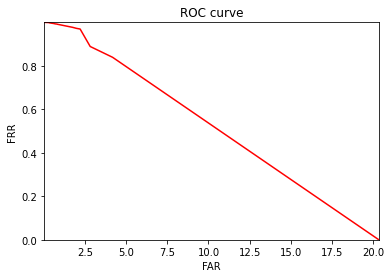

[0.0, 0.8392183418786882, 0.8889426332591661, 0.969236722453323, 0.9723323981812905, 0.9769759117732417, 0.9795878881687143, 0.981812905098191, 0.982006384831189, 0.9838444422946696, 0.9845216213601625, 0.9862629389571442, 0.9863596788236432, 0.9867466382896392, 0.9876172970881301, 0.987810776821128, 0.9881977362871239, 0.9890683950856147, 0.9891651349521138, 0.9891651349521138, 0.9894553545516107, 0.9898423140176067, 0.9901325336171036, 0.9901325336171036, 0.9903260133501016, 0.9905194930830995, 0.9905194930830995, 0.9905194930830995, 0.9906162329495986, 0.9906162329495986, 0.9906162329495986, 0.9909064525490955, 0.9909064525490955, 0.9910031924155944, 0.9910031924155944, 0.9910031924155944, 0.9919705910805843, 0.9919705910805843, 0.9919705910805843, 0.9920673309470833, 0.9920673309470833, 0.9920673309470833, 0.9921640708135823, 0.9921640708135823, 0.9923575505465803, 0.9923575505465803, 0.9923575505465803, 0.9925510302795783, 0.9925510302795783, 0.9925510302795783, 0.9925510302795783

In [14]:
plot_ROC(match_data_g1g2, imposter_data_g1g2, 1000)

--------------------------------------------
0
FAR: 20.340819277108434
FRR: 0.0
threshold: 0.0
--------------------------------------------
--------------------------------------------
1
FAR: 1.264
FRR: 0.9847151010931605
threshold: 3.676767676767677
--------------------------------------------
--------------------------------------------
2
FAR: 0.9820722891566265
FRR: 0.9894553545516107
threshold: 7.353535353535354
--------------------------------------------
--------------------------------------------
3
FAR: 0.8615903614457832
FRR: 0.9909064525490955
threshold: 11.030303030303031
--------------------------------------------
--------------------------------------------
4
FAR: 0.7995180722891566
FRR: 0.9920673309470833
threshold: 14.707070707070708
--------------------------------------------
--------------------------------------------
5
FAR: 0.7372530120481928
FRR: 0.9925510302795783
threshold: 18.383838383838384
--------------------------------------------
-------------------------

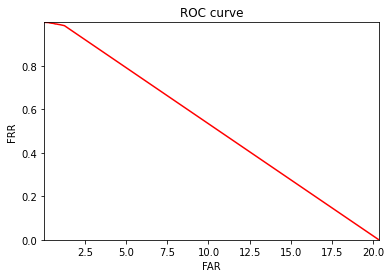

[0.0, 0.9847151010931605, 0.9894553545516107, 0.9909064525490955, 0.9920673309470833, 0.9925510302795783, 0.9925510302795783, 0.993905388410564, 0.994485827609558, 0.9949695269420529, 0.9952597465415498, 0.9957434458740447, 0.9958401857405437, 0.9960336654735417, 0.9962271452065397, 0.9966141046725355, 0.9969043242720325, 0.9970010641385315, 0.9971945438715295, 0.9972912837380284, 0.9980652026700203, 0.9986456418690142, 0.9986456418690142, 0.9987423817355132, 0.9990326013350102, 0.9990326013350102, 0.9991293412015091, 0.9992260810680081, 0.9992260810680081, 0.9992260810680081, 0.9992260810680081, 0.9992260810680081, 0.9992260810680081, 0.9992260810680081, 0.9994195608010061, 0.9994195608010061, 0.9994195608010061, 0.9994195608010061, 0.9994195608010061, 0.9994195608010061, 0.9995163006675051, 0.999613040534004, 0.999613040534004, 0.999613040534004, 0.999613040534004, 0.999613040534004, 0.999613040534004, 0.999613040534004, 0.999613040534004, 0.999613040534004, 0.999613040534004, 0.9996

In [16]:
plot_ROC(match_data_g1g2, imposter_data_g1g2, 100)

In [14]:
np.linspace(0.0, 364.0, 100)

array([  0.        ,   3.67676768,   7.35353535,  11.03030303,
        14.70707071,  18.38383838,  22.06060606,  25.73737374,
        29.41414141,  33.09090909,  36.76767677,  40.44444444,
        44.12121212,  47.7979798 ,  51.47474747,  55.15151515,
        58.82828283,  62.50505051,  66.18181818,  69.85858586,
        73.53535354,  77.21212121,  80.88888889,  84.56565657,
        88.24242424,  91.91919192,  95.5959596 ,  99.27272727,
       102.94949495, 106.62626263, 110.3030303 , 113.97979798,
       117.65656566, 121.33333333, 125.01010101, 128.68686869,
       132.36363636, 136.04040404, 139.71717172, 143.39393939,
       147.07070707, 150.74747475, 154.42424242, 158.1010101 ,
       161.77777778, 165.45454545, 169.13131313, 172.80808081,
       176.48484848, 180.16161616, 183.83838384, 187.51515152,
       191.19191919, 194.86868687, 198.54545455, 202.22222222,
       205.8989899 , 209.57575758, 213.25252525, 216.92929293,
       220.60606061, 224.28282828, 227.95959596, 231.63

In [ ]:
#K=15

In [21]:
files.upload()

Saving imposter_knn_15_exact_same_image_is_match.txt to imposter_knn_15_exact_same_image_is_match.txt
Saving complete_knn_15_exact_same_image_is_match.txt to complete_knn_15_exact_same_image_is_match.txt
Saving match_knn_15_exact_same_image_is_match.txt to match_knn_15_exact_same_image_is_match.txt
Saving match_knn_2_exact_same_image_is_match.csv to match_knn_2_exact_same_image_is_match.csv
Saving imposter_knn_2_exact_same_image_is_match.csv to imposter_knn_2_exact_same_image_is_match.csv
Saving complete_knn_2_exact_same_image_is_match.csv to complete_knn_2_exact_same_image_is_match.csv


In [24]:
# Initialize Pandas dataframe
match_data_g_15 = pd.read_csv("match_knn2_g_same_person_is_match.csv")
match_data_g1g2_15 = pd.read_csv("match_knn2_g1_g2_same_person_is_match.csv")

# complete_data_g = pd.read_csv("complete_knn2_g_same_person_is_match.csv")
# complete_data_g1g2 = pd.read_csv("complete_knn2_g1_g2_same_person_is_match.csv")

imposter_data_g_15 = pd.read_csv("imposter_knn2_g__same_person_is_match.csv")
imposter_data_g1g2_15 = pd.read_csv("imposter_knn2_g1_g2__same_person_is_match.csv")

#Store ['score'] column in a list
match_list_g_15 = match_data_g['score']
match_list_g1g2_15 = match_data_g1g2['score']

# complete_list_g = complete_data_g['score']
# complete_list_g1g2 = complete_data_g1g2['score']

imposter_list_g_15 = imposter_data_g['score']
imposter_list_g1g2_15 = imposter_data_g1g2['score']

#Convert list to np array
match_g_np_15 = np.array(match_list_g)
match_g1g2_np_15 = np.array(match_list_g1g2)

imposter_g_np_15 = np.array(imposter_list_g)
imposter_g1g2_np_15 = np.array(imposter_list_g1g2)

# complete_g_np = np.array(complete_list_g)
# complete_g1g2_np = np.array(complete_list_g1g2)

#Do not run the function in colab, will lead to crash due to RAM usage  
#initialize_variables()

--------------------------------------------
0
FAR: 20.340819277108434
FRR: 0.0
threshold: 0.0
--------------------------------------------
--------------------------------------------
1
FAR: 1.264
FRR: 0.9847151010931605
threshold: 3.676767676767677
--------------------------------------------
--------------------------------------------
2
FAR: 0.9820722891566265
FRR: 0.9894553545516107
threshold: 7.353535353535354
--------------------------------------------
--------------------------------------------
3
FAR: 0.8615903614457832
FRR: 0.9909064525490955
threshold: 11.030303030303031
--------------------------------------------
--------------------------------------------
4
FAR: 0.7995180722891566
FRR: 0.9920673309470833
threshold: 14.707070707070708
--------------------------------------------
--------------------------------------------
5
FAR: 0.7372530120481928
FRR: 0.9925510302795783
threshold: 18.383838383838384
--------------------------------------------
-------------------------

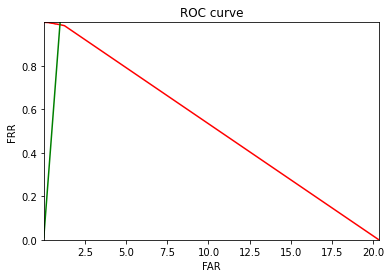

Intersection coordinates: (-1000, -1000)


AttributeError: ignored

In [27]:
plot_ROC(match_data_g1g2_15, imposter_data_g1g2_15, 100)

Streaming output truncated to the last 5000 lines.
FAR: 0.4194698795180723
FRR: 0.9969043242720325
threshold: 60.84884884884885
--------------------------------------------
--------------------------------------------
168
FAR: 0.41445783132530123
FRR: 0.9970010641385315
threshold: 61.213213213213216
--------------------------------------------
--------------------------------------------
169
FAR: 0.41445783132530123
FRR: 0.9970010641385315
threshold: 61.57757757757758
--------------------------------------------
--------------------------------------------
170
FAR: 0.41445783132530123
FRR: 0.9970010641385315
threshold: 61.94194194194194
--------------------------------------------
--------------------------------------------
171
FAR: 0.40925301204819275
FRR: 0.9970010641385315
threshold: 62.306306306306304
--------------------------------------------
--------------------------------------------
172
FAR: 0.40925301204819275
FRR: 0.9970010641385315
threshold: 62.670670670670674
---------

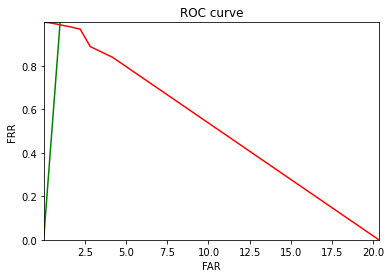

Intersection coordinates: (0.9868561814826874, 0.9868561814826874)


AttributeError: ignored

In [30]:
plot_ROC(match_data_g1g2_15, imposter_data_g1g2_15, 1000)